# **Good-Bad Credit Card customers data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# warning.filterwarnings()   #to filter warnings

In [ ]:
credit_card_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Practice/Credit (2).csv")
credit_card_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0,Good


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [ ]:
credit_card_data.describe().T

,count,mean,std,min,25%,50%,75%,max
NPA Status,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome.1,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [ ]:
# Deleting duplicate columns

credit_card_data.drop(columns= ['MonthlyIncome.1', 'Good_Bad'], inplace=True)
credit_card_data.shape

(150002, 16)

### **Univariate Analysis**

##### 1. **NPA status** 

In [ ]:
credit_card_data['NPA Status'].value_counts()

0.0    139974
1.0     10026
Name: NPA Status, dtype: int64

In [ ]:
credit_card_data[credit_card_data['NPA Status'].isnull()]

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good
150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad


In [ ]:
# As the data in the rows look useless, we remove it

credit_card_data.dropna(subset=['NPA Status'], inplace=True)
credit_card_data.shape

(150000, 16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


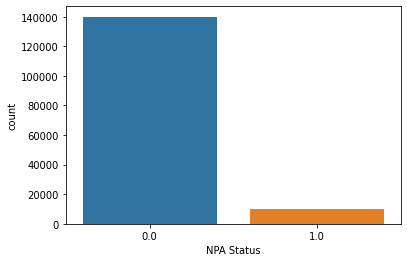

In [ ]:
sns.countplot(credit_card_data['NPA Status'])

##### It shows that our dataset is highly biased and contains more data of Good customers and less data of Bad customers.


##### 2. **RevolvingUtilizationOfUnsecuredLines**

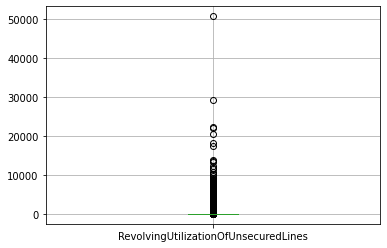

In [ ]:
credit_card_data.boxplot(column = 'RevolvingUtilizationOfUnsecuredLines')

In [ ]:
Q_99 = credit_card_data['RevolvingUtilizationOfUnsecuredLines'].quantile(0.99)
Q_99

1.092955768140002

In [ ]:
# 2 is the value of RevolvingUtilizationOfUnsecuredLines given by the client

credit_card_data = credit_card_data[credit_card_data['RevolvingUtilizationOfUnsecuredLines'] < 2]
credit_card_data.shape

(149629, 16)

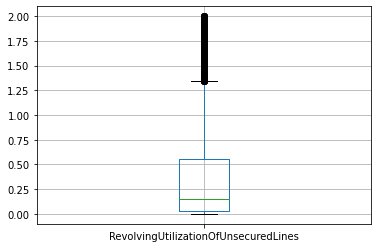

In [ ]:
credit_card_data.boxplot(column = 'RevolvingUtilizationOfUnsecuredLines')

##### 3. **Age**

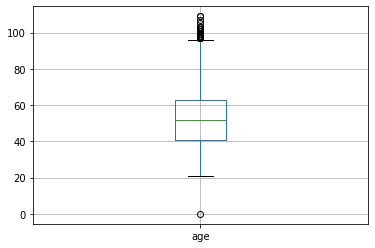

In [ ]:
credit_card_data.boxplot(column = 'age')

In [ ]:
credit_card_data['age'].unique()

array([ 45.,  40.,  38.,  30.,  49.,  74.,  57.,  39.,  27.,  51.,  46.,
        76.,  64.,  78.,  53.,  43.,  25.,  32.,  58.,  50.,  69.,  24.,
        28.,  62.,  42.,  75.,  26.,  52.,  41.,  81.,  31.,  68.,  70.,
        73.,  29.,  55.,  35.,  72.,  60.,  67.,  36.,  56.,  37.,  66.,
        83.,  34.,  44.,  48.,  61.,  80.,  47.,  59.,  77.,  63.,  54.,
        33.,  79.,  65.,  86.,  92.,  23.,  87.,  71.,  22.,  90.,  97.,
        84.,  82.,  91.,  89.,  85.,  88.,  21.,  93.,  96.,  99.,  94.,
        95., 101.,  98., 103., 102., 109., 107., 105.,   0.])

In [ ]:
credit_card_data[credit_card_data['age'] == 0]

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
88487,0.0,1.0,0.0,Male,Central,6000.0,Rented,Self_Emp,Graduate,1.0,0.436927,6.0,0.0,2.0,0.0,2


In [ ]:
from statistics import mode
credit_card_data['age'].replace(0, mode(credit_card_data['age']), inplace = True)
credit_card_data.shape

(149629, 16)

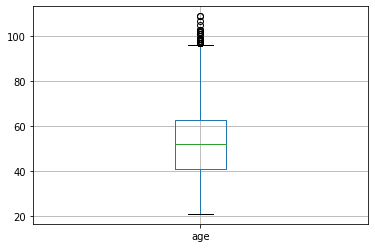

In [ ]:
credit_card_data.boxplot(column = 'age')

##### 4. **Gender**

In [ ]:
credit_card_data['Gender'].value_counts()

Male      92072
Female    57557
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


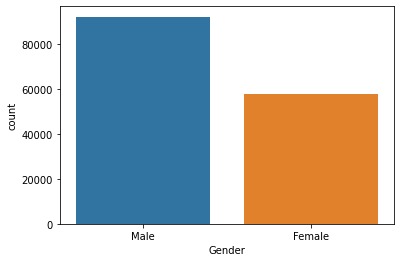

In [ ]:
sns.countplot(credit_card_data['Gender'])

##### 5. **Region**

In [ ]:
credit_card_data['Region'].value_counts()

Central    43850
North      34015
West       27822
South      23444
East       20498
Name: Region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


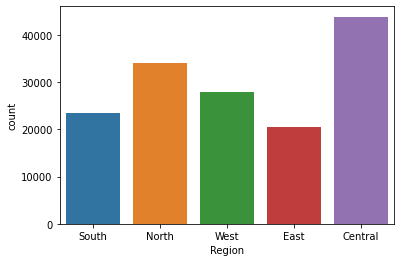

In [ ]:
sns.countplot(credit_card_data['Region'])

##### 6. **MonthlyIncome**

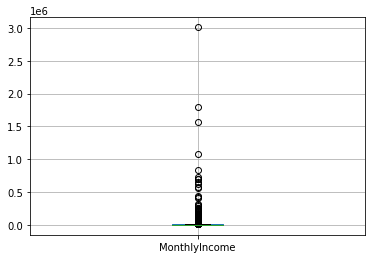

In [ ]:
credit_card_data.boxplot(column = 'MonthlyIncome')

In [ ]:
credit_card_data['MonthlyIncome'].isnull().sum()

29638

In [ ]:
credit_card_data['MonthlyIncome'].fillna(value=0, inplace = True)
credit_card_data['MonthlyIncome'].isnull().sum()

0

In [ ]:
credit_card_data['MonthlyIncome'] = np.where(credit_card_data['MonthlyIncome'] == 0, 
                                             credit_card_data['MonthlyIncome'].mean(), credit_card_data['MonthlyIncome'])
credit_card_data.shape

(149629, 16)

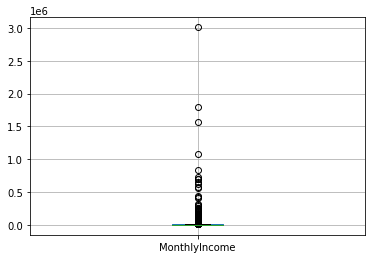

In [ ]:
credit_card_data.boxplot(column = 'MonthlyIncome')

In [ ]:
#credit_card_data['MonthlyIncome'].quantile(0.99)

In [ ]:
#Q1 = credit_card_data['MonthlyIncome'].quantile(0.25)
#Q3 = credit_card_data['MonthlyIncome'].quantile(0.75)
#IQR = Q3 - Q1

#credit_card_data = credit_card_data[~((credit_card_data['MonthlyIncome'] < (Q1 - 1.5 * IQR)) |(credit_card_data['MonthlyIncome'] > (Q3 + 1.5 * IQR)))]
#credit_card_data.shape

##### 7. **Rented_OwnHouse**

In [ ]:
credit_card_data['Rented_OwnHouse'].value_counts()

Ownhouse    85742
Rented      63887
Name: Rented_OwnHouse, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


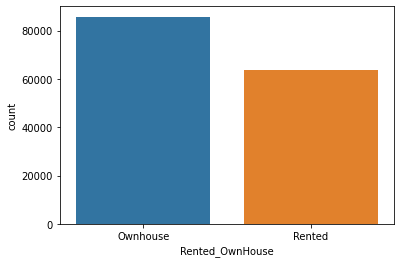

In [ ]:
sns.countplot(credit_card_data['Rented_OwnHouse'])

##### 8. **Occupation**

In [ ]:
credit_card_data['Occupation'].value_counts()

Self_Emp       63953
Non-officer    41011
Officer3       16236
Officer1       15127
Officer2       13302
Name: Occupation, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


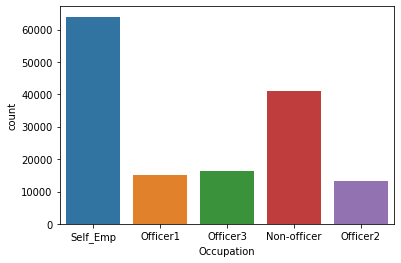

In [ ]:
sns.countplot(credit_card_data['Occupation'])

##### 9. **NumberOfTime30-59DaysPastDueNotWorse**

In [ ]:
credit_card_data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0.0     125727
1.0      15988
2.0       4579
3.0       1746
4.0        744
5.0        340
98.0       264
6.0        138
7.0         53
8.0         25
9.0         12
96.0         5
10.0         4
12.0         2
13.0         1
11.0         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

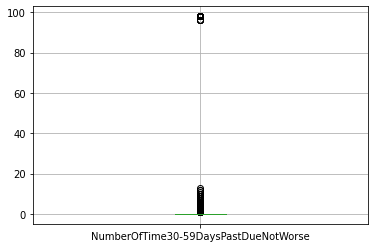

In [ ]:
credit_card_data.boxplot(column = 'NumberOfTime30-59DaysPastDueNotWorse')

In [ ]:
Quant99 = credit_card_data['NumberOfTime30-59DaysPastDueNotWorse'].quantile(0.99)
Quant99

4.0

In [ ]:
credit_card_data['NumberOfTime30-59DaysPastDueNotWorse'] = np.where(credit_card_data['NumberOfTime30-59DaysPastDueNotWorse'] > 25, 
                                             mode(credit_card_data['NumberOfTime30-59DaysPastDueNotWorse']), 
                                             credit_card_data['NumberOfTime30-59DaysPastDueNotWorse'])
credit_card_data.shape

(149629, 16)

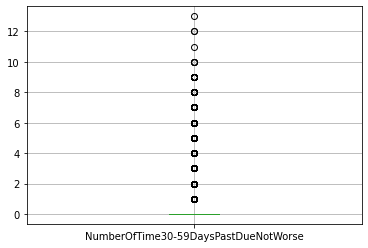

In [ ]:
credit_card_data.boxplot(column = 'NumberOfTime30-59DaysPastDueNotWorse')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


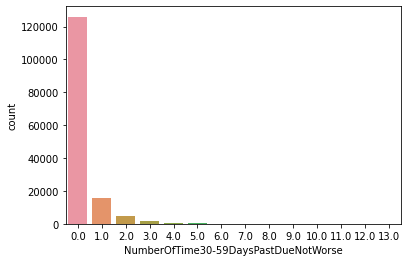

In [ ]:
sns.countplot(credit_card_data['NumberOfTime30-59DaysPastDueNotWorse'])

##### 10. **DebtRatio**

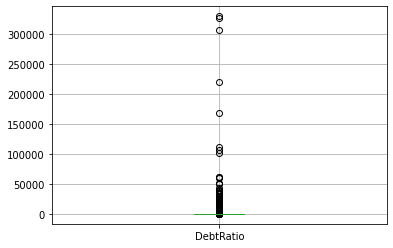

In [ ]:
credit_card_data.boxplot(column = 'DebtRatio')

In [ ]:
credit_card_data['DebtRatio'].quantile(0.99)

4978.720000000001

In [ ]:
# 2 is the value of RevolvingUtilizationOfUnsecuredLines given by the client

credit_card_data['DebtRatio'] = np.where(credit_card_data['DebtRatio'] > 2, 2, credit_card_data['DebtRatio'])
credit_card_data.shape

(149629, 16)

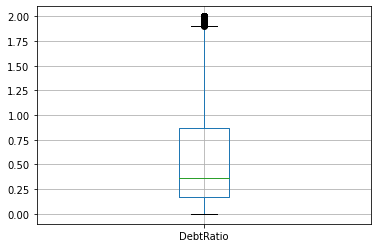

In [ ]:
credit_card_data.boxplot(column = 'DebtRatio')

##### 11. **NumberOfOpenCreditLinesAndLoans**

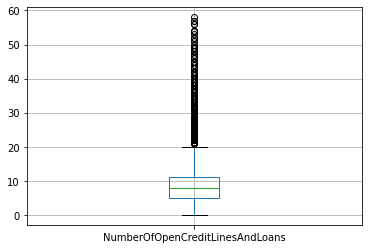

In [ ]:
credit_card_data.boxplot(column = 'NumberOfOpenCreditLinesAndLoans')

In [ ]:
# Counting the number of unique values in the column 'NumberOfOpenCreditLinesAndLoans'

credit_card_data['NumberOfOpenCreditLinesAndLoans'].nunique()

58

In [ ]:
# Checking the skewness of the data

Q_99 = credit_card_data['NumberOfOpenCreditLinesAndLoans'].quantile(0.99)
Q_99

24.0

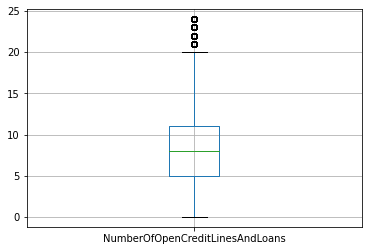

In [ ]:
# Highly skewed data which needs to be treated.

credit_card_data['NumberOfOpenCreditLinesAndLoans'] = np.where(credit_card_data['NumberOfOpenCreditLinesAndLoans'] > 24, 24, credit_card_data['NumberOfOpenCreditLinesAndLoans'])
credit_card_data.boxplot(column = 'NumberOfOpenCreditLinesAndLoans')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


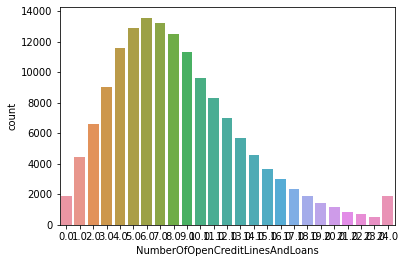

In [ ]:
sns.countplot(credit_card_data['NumberOfOpenCreditLinesAndLoans'])

##### 12. **NumberOfTimes90DaysLate**

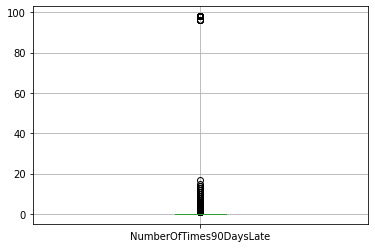

In [ ]:
credit_card_data.boxplot(column = 'NumberOfTimes90DaysLate')

In [ ]:
credit_card_data['NumberOfTimes90DaysLate'] = np.where(credit_card_data['NumberOfTimes90DaysLate'] > 25, 
                                             mode(credit_card_data['NumberOfTimes90DaysLate']), 
                                             credit_card_data['NumberOfTimes90DaysLate'])
credit_card_data.shape

(149629, 16)

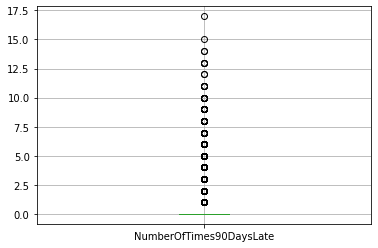

In [ ]:
credit_card_data.boxplot(column = 'NumberOfTimes90DaysLate')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


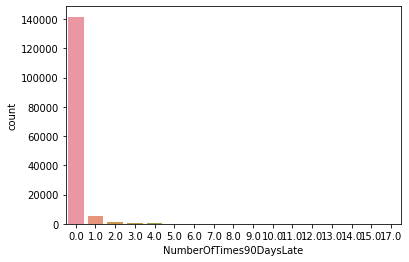

In [ ]:
sns.countplot(credit_card_data['NumberOfTimes90DaysLate'])

##### 13. **NumberRealEstateLoansOrLines**

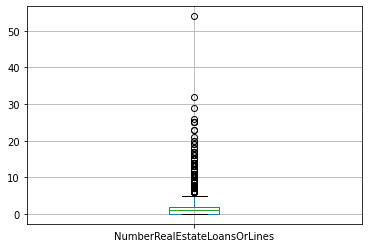

In [ ]:
credit_card_data.boxplot(column = 'NumberRealEstateLoansOrLines')

In [ ]:
# Checking the skewness of the data

Q_99 = credit_card_data['NumberRealEstateLoansOrLines'].quantile(0.99)
Q_99

4.0

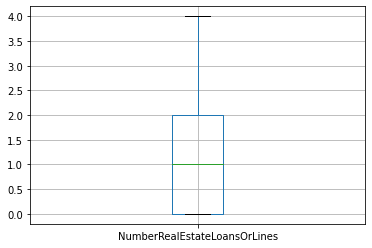

In [ ]:
# Highly skewed data which needs to be treated.

credit_card_data['NumberRealEstateLoansOrLines'] = np.where(credit_card_data['NumberRealEstateLoansOrLines'] > 4, 4, credit_card_data['NumberRealEstateLoansOrLines'])
credit_card_data.boxplot(column = 'NumberRealEstateLoansOrLines')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


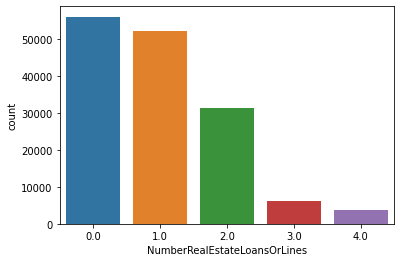

In [ ]:
sns.countplot(credit_card_data['NumberRealEstateLoansOrLines'])

##### 14. **NumberOfTime60-89DaysPastDueNotWorse**

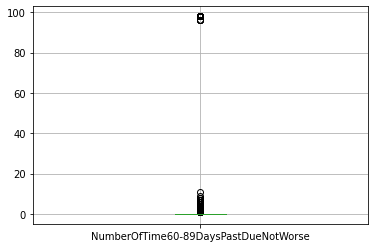

In [ ]:
credit_card_data.boxplot(column = 'NumberOfTime60-89DaysPastDueNotWorse')

In [ ]:
credit_card_data['NumberOfTime60-89DaysPastDueNotWorse'] = np.where(credit_card_data['NumberOfTime60-89DaysPastDueNotWorse'] > 25, 
                                             mode(credit_card_data['NumberOfTime60-89DaysPastDueNotWorse']), 
                                             credit_card_data['NumberOfTime60-89DaysPastDueNotWorse'])
credit_card_data.shape

(149629, 16)

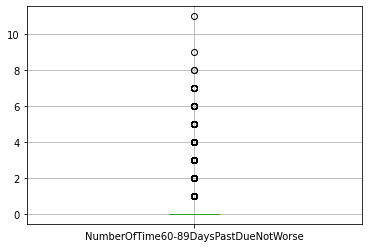

In [ ]:
credit_card_data.boxplot(column = 'NumberOfTime60-89DaysPastDueNotWorse')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


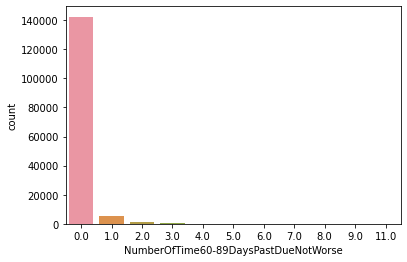

In [ ]:
sns.countplot(credit_card_data['NumberOfTime60-89DaysPastDueNotWorse'])

##### 15. **NumberOfDependents**

In [ ]:
credit_card_data['NumberOfDependents'].value_counts()

0.0     75755
1.0     22983
2.0     17037
0       10928
3.0      8233
1        3281
4.0      2494
2        2430
3        1225
5.0       636
4         363
6.0       133
5         110
7.0        45
6          25
8.0        20
7           6
10.0        5
8           4
9.0         3
9           2
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

In [ ]:
#Filling NaN values with the mode of the data
credit_card_data['NumberOfDependents'].fillna(mode(credit_card_data['NumberOfDependents']), inplace = True)

In [ ]:
# Changing the datatype of the column to int
credit_card_data['NumberOfDependents'] = credit_card_data['NumberOfDependents'].astype(int)

In [ ]:
credit_card_data['NumberOfDependents'].value_counts()

0     90592
1     26264
2     19467
3      9458
4      2857
5       746
6       158
7        51
8        24
10        5
9         5
20        1
13        1
Name: NumberOfDependents, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


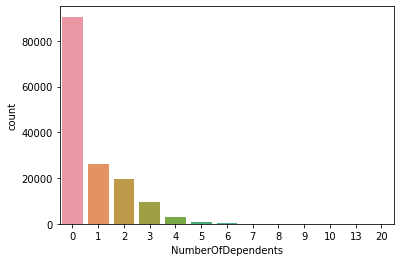

In [ ]:
sns.countplot(credit_card_data['NumberOfDependents'])

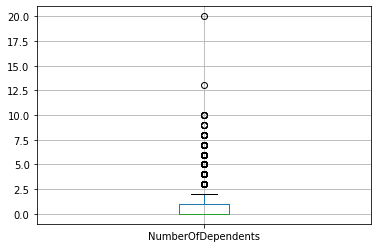

In [ ]:
credit_card_data.boxplot(column = 'NumberOfDependents')

### **Univariate Analysis Summary** 

##### Checked the skewness of all columns wherever it was necessary and then treating the data of columns.

In [ ]:
credit_card_data.describe().T

,count,mean,std,min,25%,50%,75%,max
NPA Status,149629.0,0.066645,0.249407,0.0,0.000000,0.000000,0.000000,1.000000e+00
RevolvingUtilizationOfUnsecuredLines,149629.0,0.320335,0.355467,0.0,0.029728,0.153180,0.554412,1.998676e+00
age,149629.0,52.304774,14.772124,21.0,41.000000,52.000000,63.000000,1.090000e+02
MonthlyIncome,149629.0,6464.135737,12887.067789,1.0,4000.000000,5346.752421,7396.000000,3.008750e+06
NumberOfTime30-59DaysPastDueNotWorse,149629.0,0.244973,0.696362,0.0,0.000000,0.000000,0.000000,1.300000e+01
DebtRatio,149629.0,0.682166,0.722750,0.0,0.174970,0.366493,0.866853,2.000000e+00
NumberOfOpenCreditLinesAndLoans,149629.0,8.409894,4.947864,0.0,5.000000,8.000000,11.000000,2.400000e+01
NumberOfTimes90DaysLate,149629.0,0.089642,0.481282,0.0,0.000000,0.000000,0.000000,1.700000e+01
NumberRealEstateLoansOrLines,149629.0,0.992602,0.985909,0.0,0.000000,1.000000,2.000000,4.000000e+00
NumberOfTime60-89DaysPastDueNotWorse,149629.0,0.064406,0.328659,0.0,0.000000,0.000000,0.000000,1.100000e+01


### **Bivariate Analysis** 

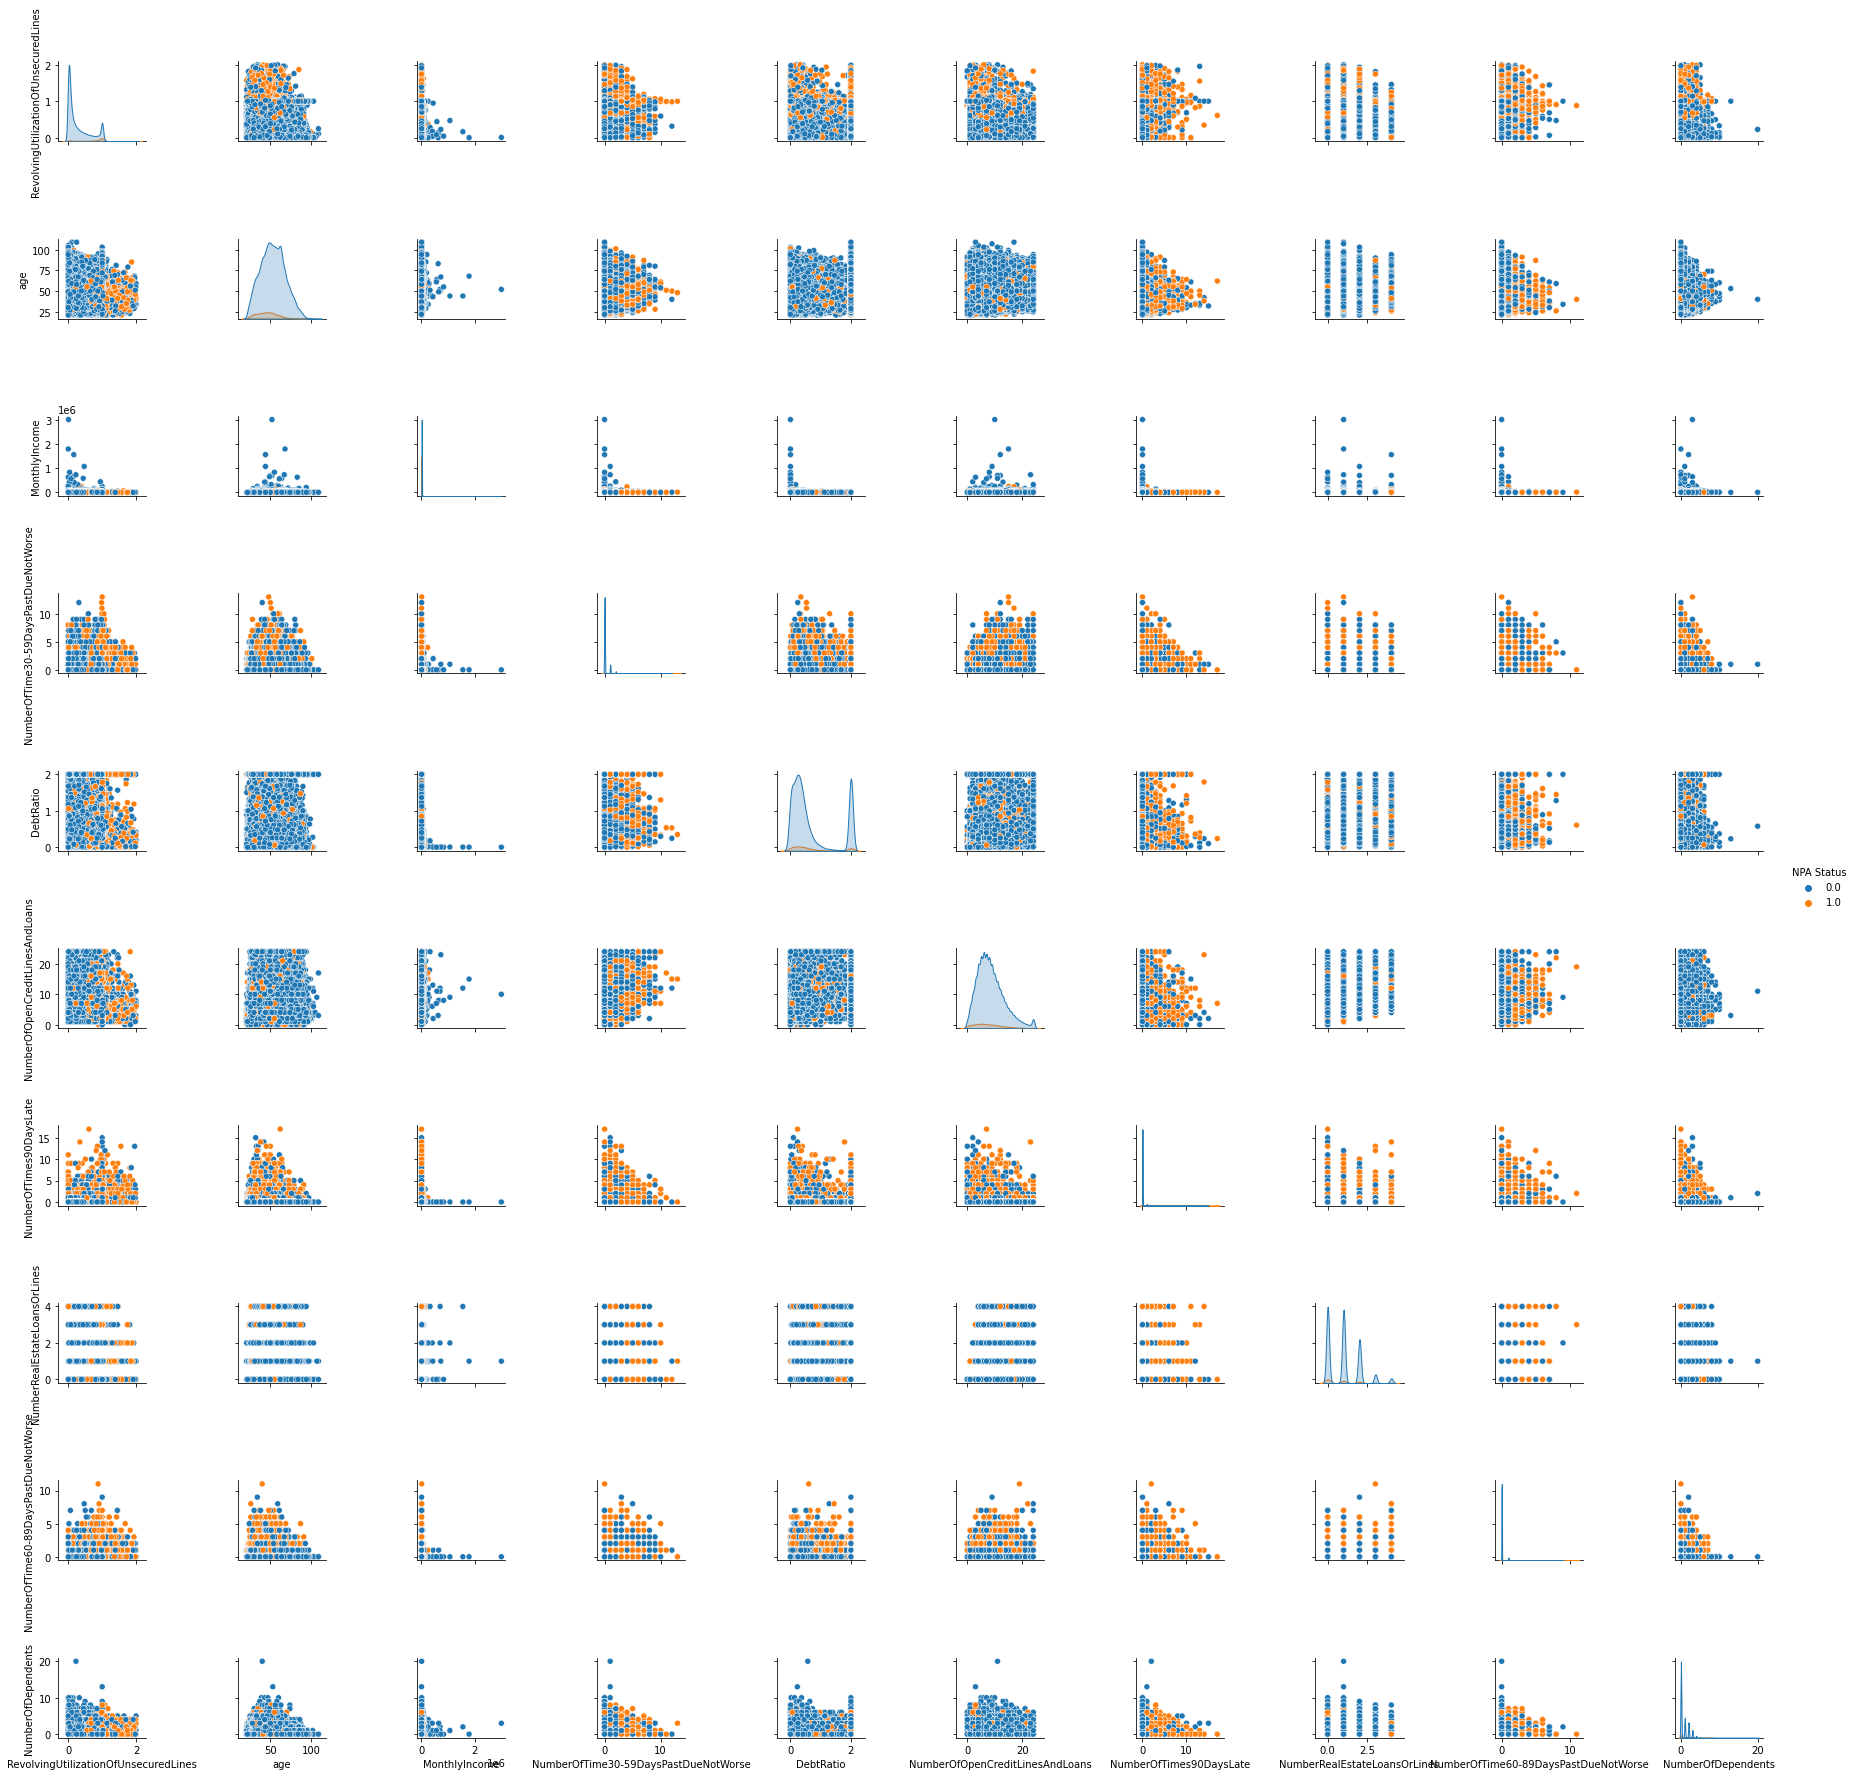

In [ ]:
sns.pairplot(credit_card_data, hue='NPA Status')

In [ ]:
credit_card_data.corr()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
NPA Status,1.000000,0.285423,-0.115260,-0.017430,0.270910,0.002610,-0.031257,0.311354,-0.019494,0.264880,0.046914
RevolvingUtilizationOfUnsecuredLines,0.285423,1.000000,-0.278798,-0.030242,0.242419,-0.022311,-0.164666,0.250349,-0.080636,0.204298,0.090662
age,-0.115260,-0.278798,1.000000,0.026159,-0.070951,0.086096,0.149929,-0.081988,0.035965,-0.069165,-0.215866
MonthlyIncome,-0.017430,-0.030242,0.026159,1.000000,-0.000178,-0.072361,0.086643,-0.017838,0.113317,-0.009960,0.066599
NumberOfTime30-59DaysPastDueNotWorse,0.270910,0.242419,-0.070951,-0.000178,1.000000,0.000649,0.082678,0.218281,0.038210,0.305396,0.065454
DebtRatio,0.002610,-0.022311,0.086096,-0.072361,0.000649,1.000000,0.031612,-0.005576,0.131426,0.002404,-0.145958
NumberOfOpenCreditLinesAndLoans,-0.031257,-0.164666,0.149929,0.086643,0.082678,0.031612,1.000000,-0.095298,0.447835,-0.021450,0.077312
NumberOfTimes90DaysLate,0.311354,0.250349,-0.081988,-0.017838,0.218281,-0.005576,-0.095298,1.000000,-0.070632,0.296357,0.031864
NumberRealEstateLoansOrLines,-0.019494,-0.080636,0.035965,0.113317,0.038210,0.131426,0.447835,-0.070632,1.000000,-0.025487,0.144690
NumberOfTime60-89DaysPastDueNotWorse,0.264880,0.204298,-0.069165,-0.009960,0.305396,0.002404,-0.021450,0.296357,-0.025487,1.000000,0.037843


In [ ]:
credit_card_data.dtypes

NPA Status                              float64
RevolvingUtilizationOfUnsecuredLines    float64
age                                     float64
Gender                                   object
Region                                   object
MonthlyIncome                           float64
Rented_OwnHouse                          object
Occupation                               object
Education                                object
NumberOfTime30-59DaysPastDueNotWorse    float64
DebtRatio                               float64
NumberOfOpenCreditLinesAndLoans         float64
NumberOfTimes90DaysLate                 float64
NumberRealEstateLoansOrLines            float64
NumberOfTime60-89DaysPastDueNotWorse    float64
NumberOfDependents                        int64
dtype: object

### **Preprocessing of Data** 

In [ ]:
label_encoder = preprocessing.LabelEncoder()

credit_card_data['Gender'] = label_encoder.fit_transform(credit_card_data['Gender'])
print("Gender unique values-", credit_card_data['Gender'].unique())

credit_card_data['Region'] = label_encoder.fit_transform(credit_card_data['Region'])
print("Region unique values-", credit_card_data['Region'].unique())

credit_card_data['Rented_OwnHouse'] = label_encoder.fit_transform(credit_card_data['Rented_OwnHouse'])
print("Rented_OwnHouse unique values-", credit_card_data['Rented_OwnHouse'].unique())

credit_card_data['Occupation'] = label_encoder.fit_transform(credit_card_data['Occupation'])
print("Occupation unique values-", credit_card_data['Occupation'].unique())

credit_card_data['Education'] = label_encoder.fit_transform(credit_card_data['Education'])
print("Education unique values-", credit_card_data['Education'].unique())

Gender unique values- [1 0]
Region unique values- [3 2 4 1 0]
Rented_OwnHouse unique values- [0 1]
Occupation unique values- [4 1 3 0 2]
Education unique values- [1 0 2 4 3]


In [ ]:
credit_card_data.dtypes

NPA Status                              float64
RevolvingUtilizationOfUnsecuredLines    float64
age                                     float64
Gender                                    int64
Region                                    int64
MonthlyIncome                           float64
Rented_OwnHouse                           int64
Occupation                                int64
Education                                 int64
NumberOfTime30-59DaysPastDueNotWorse    float64
DebtRatio                               float64
NumberOfOpenCreditLinesAndLoans         float64
NumberOfTimes90DaysLate                 float64
NumberRealEstateLoansOrLines            float64
NumberOfTime60-89DaysPastDueNotWorse    float64
NumberOfDependents                        int64
dtype: object

In [ ]:
# Splitting the dataframe into training and test set in the ratio of 70:30 
Y = credit_card_data['NPA Status']
X = credit_card_data.drop(['NPA Status'], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 101)

In [ ]:
# As the type of columns is very different from each other, scaling needs to be done in all the columns.

StandardScalar = preprocessing.StandardScaler()
StandardScalar = StandardScalar.fit(X_train)
X_train = StandardScalar.transform(X_train)
X_test = StandardScalar.transform(X_test)

### **Model with Accuracy** 

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Train Accuracy:", clf.score(X_train, Y_train))

Train Accuracy: 0.9425052510979568


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,f1_score, accuracy_score
Y_pred = clf.predict(X_test)
print("Test Accuracy:" + str(accuracy_score(Y_test, Y_pred)))

Test Accuracy:0.9412105415580655
